# TP du SVM en Sentiment Analysis
### AGRAT MOHAMMED




# import libraries:

In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
import seaborn as sns
import spacy
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


Set up completed ....


In [10]:
# load the data
X = pd.read_csv('reviews.txt', names=['review'])
y = pd.read_csv('labels.txt',names=['label'])

In [11]:
X.shape , y.shape

((5000, 1), (5000, 1))

(5000, 1)

In [12]:
X.head()

,review
0,bromwell high is a cartoon comedy . it ran at ...
1,story of a man who has unnatural feelings for ...
2,homelessness or houselessness as george carli...
3,airport starts as a brand new luxury pla...
4,brilliant over acting by lesley ann warren . ...


In [13]:
y.head()

,label
0,positive
1,negative
2,positive
3,negative
4,positive


<Axes: ylabel='label'>

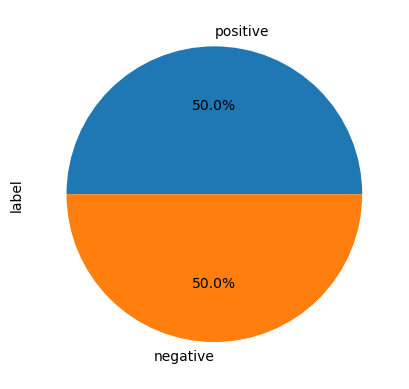

In [14]:
y['label'].value_counts().plot(kind='pie' ,  autopct='%1.1f%%')

In [8]:
y = y.label.map({'positive':1 , 'negative':0})

#### 3- prepare the data for training :

In [9]:
nlp = spacy.load("en_core_web_sm")

In [10]:
def preprocessing(text: str) -> str:
    doc = nlp(text.lower())
    tokens = [ word.lemma_ for word in doc if not (word.is_stop or word.is_punct)]
    return ' '.join(tokens)

In [11]:
X["processed_review"] = X.review.apply(lambda text:preprocessing(text))

In [12]:
X.head()

,review,processed_review
0,bromwell high is a cartoon comedy . it ran at ...,bromwell high cartoon comedy run time program ...
1,story of a man who has unnatural feelings for ...,story man unnatural feeling pig start opening ...
2,homelessness or houselessness as george carli...,homelessness houselessness george carlin sta...
3,airport starts as a brand new luxury pla...,airport start brand new luxury plane l...
4,brilliant over acting by lesley ann warren . ...,brilliant act lesley ann warren well dramati...


In [13]:
# split the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X.processed_review, y, test_size=0.2)

In [14]:
X_train.shape, y_train.shape

((4000,), (4000,))

In [15]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)

In [16]:
X_train.shape

(4000, 26016)

In [17]:
X_test = cv.transform(X_test)

#### 4- train the SVM model:

In [18]:
# Parameters to test for each SVM type
parameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf']
}
# SVM model
svm_model = svm.SVC()

# Find the best hyperparameters for each SVM type
grid_svm = GridSearchCV(svm_model, parameters, refit = True, verbose = 3)
grid_svm.fit(X_train, y_train)

# print best parameter after tuning
print(grid_svm.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svm.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.863 total time=   6.8s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.850 total time=   5.7s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.850 total time=   5.9s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.864 total time=   6.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.854 total time=   5.7s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=  13.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=  13.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=  13.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=  13.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=  13.5s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.863 total time=   6.2s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

#### 5- regression model:

In [24]:
regression_model = LogisticRegression()
regression_model.fit(X_train,y_train)

C:\Users\asus\programing\ML\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_predicted = regression_model.predict(X_test)

# print classification report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       501
           1       0.86      0.91      0.88       499

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



#### 6- using naive byes:

In [26]:
naive_byes_model = MultinomialNB()
naive_byes_model.fit(X_train, y_train)

MultinomialNB()

In [27]:
y_predicted = naive_byes_model.predict(X_test)

# print classification report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       501
           1       0.90      0.89      0.89       499

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



#### 7- using KNN:

In [29]:
parameters = dict(n_neighbors=[i for i in range(1,100) if i%2!= 0])

# KNN model
knn_model = KNeighborsClassifier()

# Find the best hyperparameters for each KNN model
grid_knn = GridSearchCV(knn_model, parameters, refit = True, verbose = 3)
grid_knn.fit(X_train, y_train)

# print best parameter after tuning
print(grid_knn.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_knn.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.594 total time=   0.1s
[CV 2/5] END .....................n_neighbors=1;, score=0.559 total time=   0.1s
[CV 3/5] END .....................n_neighbors=1;, score=0.615 total time=   0.1s
[CV 4/5] END .....................n_neighbors=1;, score=0.604 total time=   0.2s
[CV 5/5] END .....................n_neighbors=1;, score=0.578 total time=   0.1s
[CV 1/5] END .....................n_neighbors=3;, score=0.601 total time=   0.1s
[CV 2/5] END .....................n_neighbors=3;, score=0.623 total time=   0.1s
[CV 3/5] END .....................n_neighbors=3;, score=0.586 total time=   0.2s
[CV 4/5] END .....................n_neighbors=3;, score=0.615 total time=   0.1s
[CV 5/5] END .....................n_neighbors=3;, score=0.620 total time=   0.1s
[CV 1/5] END .....................n_neighbors=5;, score=0.614 total time=   0.1s
[CV 2/5] END .....................n_neighbors=5

In [30]:
grid_predictions = grid_knn.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.70      0.53      0.61       501
           1       0.62      0.78      0.69       499

    accuracy                           0.65      1000
   macro avg       0.66      0.65      0.65      1000
weighted avg       0.66      0.65      0.65      1000



#### 8- using Random forest:

In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
random_forest_model = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
grid_random_forest = RandomizedSearchCV(
    estimator = random_forest_model,
    param_distributions = random_grid,
    n_iter = 100,
    cv = 3,
    verbose=2,
    random_state=42,
    n_jobs = -1)
# Fit the random search model
grid_random_forest.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [33]:
grid_predictions = grid_random_forest.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       501
           1       0.84      0.90      0.87       499

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



# result:


the accuracy in Naive byes model is 91% 
the accuracy inLogistic regression  model is 88% 
accuracy in SVM  model is 88% 
accuracy in KNN   model is 88% 
accuracy in Random Forest model is 88% 